# logistic regression

In [1]:
#one of linear models, so computationally scalable to big data, compared to models like KNN or random forest.
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import warnings
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [9]:
my_df = pd.read_csv("/home/megha/WM/twitter_Web_Mining/final_data/Combined_final_14may.csv",index_col=0)
my_df_test  = pd.read_csv("/home/megha/WM/twitter_Web_Mining/final_data/samsung_test_final_14may.csv",index_col=0)



In [10]:
print(my_df.shape)
print(my_df_test.shape)

(54093, 12)
(2901, 11)


In [14]:
list(my_df)

['Checked',
 'brand',
 'date',
 'id',
 'permalink',
 'polarity',
 'polarityNum',
 'polarity_confidence',
 'subjectivity',
 'subjectivity_confidence',
 'text_original',
 'text_preprocessed',
 'Brand']

In [12]:
list(my_df_test)

['date',
 'text_original',
 'permalink',
 'Brand',
 'text_preprocessed',
 'polarity',
 'polarity_confidence',
 'subjectivity',
 'subjectivity_confidence',
 'polarityNum',
 'Checked']

In [13]:
my_df['Brand'] = my_df['brand']

In [ ]:
my_df

In [4]:
my_df.head()

,Checked,brand,date,id,permalink,polarity,polarityNum,polarity_confidence,subjectivity,subjectivity_confidence,text_original,text_preprocessed
Brand,,,,,,,,,,,,
Samsung,1.0,NaN,2017-10-31 23:52,925495649730117632,https://twitter.com/MyPhoneMyWorld/status/9254...,neutral,0.0,0.972387,objective,0.999999,# phone gear Anti Gravity Casing for iPhone an...,phone gear anti gravity casing iphone samsung ...
Samsung,1.0,NaN,2017-10-31 23:32,925490587402465280,https://twitter.com/SinamonLance/status/925490...,negative,-1.0,0.785670,subjective,1.000000,Went to the cell phone repair place and they s...,went cell phone repair place said d need conta...
Samsung,1.0,NaN,2017-10-31 22:35,925476232380145664,https://twitter.com/cosmo_nz/status/9254762323...,neutral,0.0,0.664289,objective,0.999453,"Great uses for ""defunct"" phones. The ""reuse"" p...",great us defunct phone reuse part reuse reduce...
Samsung,1.0,NaN,2017-10-31 22:26,925473978625548289,https://twitter.com/entclassblog/status/925473...,neutral,0.0,0.865111,objective,1.000000,Samsung Galaxy A5 2018 Full Phone Specificatio...,samsung galaxy full phone specification price ...
Samsung,1.0,NaN,2017-10-31 22:22,925472949150380033,https://twitter.com/mcdroidgame/status/9254729...,negative,-1.0,0.494093,subjective,0.999850,"damn, and with Apple breaking their iOS, samsu...",damn apple breaking io samsung overloading cra...


In [16]:
my_df = my_df.drop(['date','text_original','Brand','brand','permalink','polarity_confidence','subjectivity','subjectivity_confidence','polarity','Checked'],axis=1)
my_df_test = my_df_test.drop(['date','text_original','permalink','Brand','polarity_confidence','subjectivity','subjectivity_confidence','polarity','Checked'],axis=1)

In [17]:
my_df

,id,polarityNum,text_preprocessed
Brand,,,
Samsung,925495649730117632,0.0,phone gear anti gravity casing iphone samsung ...
Samsung,925490587402465280,-1.0,went cell phone repair place said d need conta...
Samsung,925476232380145664,0.0,great us defunct phone reuse part reuse reduce...
Samsung,925473978625548289,0.0,samsung galaxy full phone specification price ...
Samsung,925472949150380033,-1.0,damn apple breaking io samsung overloading cra...
Samsung,925468959373185025,0.0,teardown huawei mate biggest phone maker depen...
Samsung,925464143699816448,-1.0,samsungmobile phone trash dropped inch air cas...
Samsung,925463287436849154,1.0,sir get free really love phone even samsung ip...
Samsung,925461761058398210,-1.0,samsungmobileus samsung samsungmobile worst cu...


In [18]:
my_df_test

,text_preprocessed,polarityNum
id,,
925495649730117632,phone gear anti gravity casing iphone samsung ...,0.0
925490587402465280,went cell phone repair place said d need conta...,-1.0
925476232380145664,great us defunct phone reuse part reuse reduce...,0.0
925473978625548289,samsung galaxy full phone specification price ...,0.0
925472949150380033,damn apple breaking io samsung overloading cra...,-1.0
925468959373185025,teardown huawei mate biggest phone maker depen...,0.0
925464143699816448,samsungmobile phone trash dropped inch air cas...,-1.0
925463287436849154,sir get free really love phone even samsung ip...,1.0
925461761058398210,samsungmobileus samsung samsungmobile worst cu...,-1.0


In [19]:
if(False):
    my_df.insert(2,'target','0')
    my_df.head()

In [20]:
if(False):
    for i in range(0, len(my_df)):
        if  my_df.loc[i]['polarity'] == 'negative':
            my_df.at[i, 'target'] = -1
        elif my_df.loc[i]['polarity'] == 'positive':
            my_df.at[i, 'target'] = 1
        else:
            my_df.at[i, 'target'] = 0

In [21]:
my_df.head()

,id,polarityNum,text_preprocessed
Brand,,,
Samsung,925495649730117632,0.0,phone gear anti gravity casing iphone samsung ...
Samsung,925490587402465280,-1.0,went cell phone repair place said d need conta...
Samsung,925476232380145664,0.0,great us defunct phone reuse part reuse reduce...
Samsung,925473978625548289,0.0,samsung galaxy full phone specification price ...
Samsung,925472949150380033,-1.0,damn apple breaking io samsung overloading cra...


In [22]:
#my_df = my_df[my_df['target'] != -1]


In [23]:
#my_df = my_df.drop(['polarity'], axis=1)


In [24]:
#my_df.head()

In [25]:
my_df['polarityNum'] = my_df['polarityNum'].astype(int)
my_df_test['polarityNum'] = my_df_test['polarityNum'].astype(int)

In [26]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54093 entries, 0 to 54092
Data columns (total 3 columns):
id                   54093 non-null int64
polarityNum          54093 non-null int64
text_preprocessed    54093 non-null object
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [27]:
my_df_test.dropna(inplace=True)
my_df_test.reset_index(drop=True,inplace=True)
my_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 2 columns):
text_preprocessed    2901 non-null object
polarityNum          2901 non-null int64
dtypes: int64(1), object(1)
memory usage: 45.4+ KB


In [28]:
x_train = my_df.text_preprocessed
y_train = my_df.polarityNum

my_df_x_test =  my_df_test.text_preprocessed
my_df_y_test = my_df_test.polarityNum

In [29]:
from sklearn.cross_validation import train_test_split
SEED = 200
x_validation, x_test, y_validation, y_test = train_test_split(my_df_x_test, my_df_y_test, test_size=.5, random_state=SEED)

In [30]:
x_validation.head()
#y_train.head()

1887    flipkart big diwali sale jio phone rival smart...
2039    eh samsung smartphone manufacturer huawei stil...
1229    samsungmobile m lose phone tablet keep freezin...
1503    samsung work s decent want something different...
2764    samsungmobile tell ya choose gb storage ya say...
Name: text_preprocessed, dtype: object

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from  sklearn.feature_extraction.text import CountVectorizer

In [32]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()   
    
    
    sentiment_fit = pipeline.fit(x_train, y_train)   
    y_pred = sentiment_fit.predict(x_test)
    
    
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test,y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [33]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print((classifier))
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

# TFIDF Vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [35]:
%%time
print("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 64.07%
accuracy score: 77.93%
model is 13.86% more accurate than null accuracy
train and test time: 1.79s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 64.07%
accuracy score: 78.28%
model is 14.21% more accurate than null accuracy
train and test time: 1.69s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 64.07%
accuracy score: 78.76%
model is 14.69% more accurate than null accuracy
train and test time: 1.68s
-----------------------------------------------------

In [36]:
%%time
print("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 64.07%
accuracy score: 77.17%
model is 13.10% more accurate than null accuracy
train and test time: 3.88s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 64.07%
accuracy score: 79.86%
model is 15.79% more accurate than null accuracy
train and test time: 4.21s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 64.07%
accuracy score: 80.83%
model is 16.76% more accurate than null accuracy
train and test time: 4.11s
------------------------------------------------------

In [37]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 64.07%
accuracy score: 77.10%
model is 13.03% more accurate than null accuracy
train and test time: 7.00s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 64.07%
accuracy score: 79.31%
model is 15.24% more accurate than null accuracy
train and test time: 7.28s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 64.07%
accuracy score: 80.34%
model is 16.28% more accurate than null accuracy
train and test time: 7.50s
-----------------------------------------------------

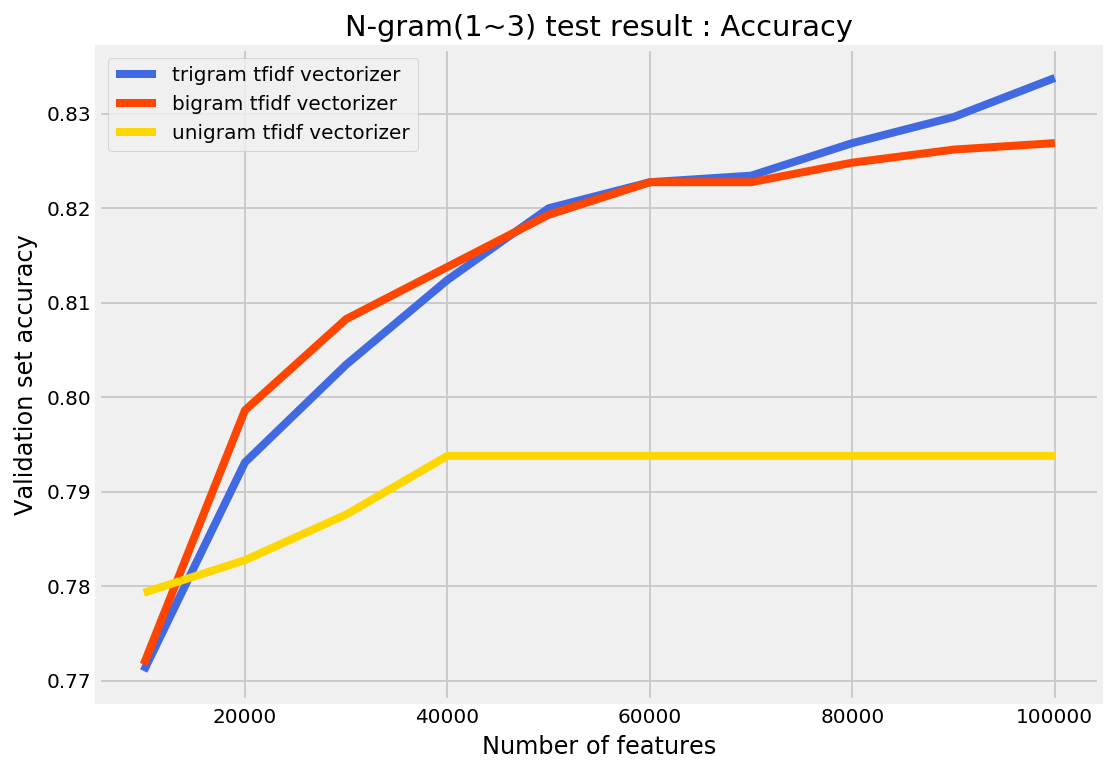

In [38]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
#plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
#plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
#plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()